<a href="https://colab.research.google.com/github/PrajwalGupta3/Object-Detection/blob/main/People_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!nvidia-smi           #gain info on the gpu

Wed Mar 12 14:50:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
!pip install ultralytics


In [9]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()





In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jmk3DsMFea8nPOxpBEen")
project = rf.workspace("people-detection-qnzez").project("people-detection-kpqn3")
version = project.version(9)
dataset = version.download("yolov8")

# since we run it on collab, after the dataset is loaded open the data.yaml file and mannually enter the
#path of train,test and val



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection-9 in yolov8:: 100%|██████████| 15344/15344 [00:05<00:00, 2807.19it/s]


In [12]:
from ultralytics import YOLO

# Correct way to load the model using a string for the weights file
model = YOLO('yolov8l.pt')

model.train(
    task='detect',
    data=r'/content/People-Detection-9/data.yaml',
    epochs=20,
    imgsz=800,
    freeze=10,
    lr0=0.005,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    plots=True
)


100%|██████████| 83.7M/83.7M [00:00<00:00, 92.8MB/s]


Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/People-Detection-9/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 79.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 286MB/s]


AMP: checks passed ✅


train: Scanning /content/People-Detection-9/train/labels... 6399 images, 102 backgrounds, 0 corrupt: 100%|██████████| 6399/6399 [00:02<00:00, 2372.07it/s]


train: New cache created: /content/People-Detection-9/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/People-Detection-9/valid/labels... 635 images, 1 backgrounds, 0 corrupt: 100%|██████████| 635/635 [00:00<00:00, 781.54it/s]


val: New cache created: /content/People-Detection-9/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.38G      1.766      1.887      1.958         58        800: 100%|██████████| 400/400 [05:10<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


                   all        635       1907        0.4      0.501      0.351      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       9.7G      1.698      1.742      1.904         82        800: 100%|██████████| 400/400 [05:08<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]

                   all        635       1907      0.469      0.497      0.418      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.71G      1.629      1.659      1.848        109        800: 100%|██████████| 400/400 [05:06<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all        635       1907      0.684      0.614      0.659      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.71G       1.58      1.572      1.806        191        800: 100%|██████████| 400/400 [05:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]

                   all        635       1907      0.693      0.618      0.675      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.71G       1.52      1.497      1.754         88        800: 100%|██████████| 400/400 [05:05<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]

                   all        635       1907      0.672      0.672       0.69      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.71G       1.48      1.446      1.729         80        800: 100%|██████████| 400/400 [05:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

                   all        635       1907      0.698      0.669      0.683      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.71G      1.464      1.411      1.713         66        800: 100%|██████████| 400/400 [05:05<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

                   all        635       1907      0.741      0.692      0.741       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      9.71G      1.427      1.378      1.678        128        800: 100%|██████████| 400/400 [05:05<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

                   all        635       1907      0.747      0.655      0.729      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.71G      1.414      1.342      1.665         63        800: 100%|██████████| 400/400 [05:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]

                   all        635       1907      0.743      0.671      0.714      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      9.71G      1.387      1.299      1.645         95        800: 100%|██████████| 400/400 [05:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all        635       1907      0.739      0.686      0.753      0.315


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      9.71G      1.393      1.151      1.687         46        800: 100%|██████████| 400/400 [05:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

                   all        635       1907      0.769      0.721      0.762      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      9.71G      1.362      1.098      1.672         38        800: 100%|██████████| 400/400 [05:04<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]

                   all        635       1907       0.78      0.752      0.787      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      9.71G      1.326      1.054       1.64         28        800: 100%|██████████| 400/400 [05:04<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

                   all        635       1907      0.782      0.728      0.774      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      9.71G      1.306       1.03      1.621         30        800: 100%|██████████| 400/400 [05:04<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all        635       1907      0.795       0.74      0.805      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.71G      1.269     0.9785      1.588         63        800: 100%|██████████| 400/400 [05:04<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

                   all        635       1907      0.802      0.736      0.785      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      9.71G      1.241     0.9504      1.564         64        800: 100%|██████████| 400/400 [05:03<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all        635       1907      0.803      0.752      0.811      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      9.71G      1.222     0.9115      1.543         55        800: 100%|██████████| 400/400 [05:03<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

                   all        635       1907      0.813      0.753      0.806      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.71G       1.19     0.8798      1.511         63        800: 100%|██████████| 400/400 [05:03<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]

                   all        635       1907      0.811      0.765      0.826      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      9.71G      1.171      0.858      1.498         29        800: 100%|██████████| 400/400 [05:03<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

                   all        635       1907       0.82      0.758      0.824        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.71G      1.147     0.8273      1.474         50        800: 100%|██████████| 400/400 [05:04<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

                   all        635       1907      0.827      0.754      0.816      0.399



20 epochs completed in 1.839 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


                   all        635       1907      0.812      0.765      0.826      0.417
Speed: 0.4ms preprocess, 24.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78a15722cfd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

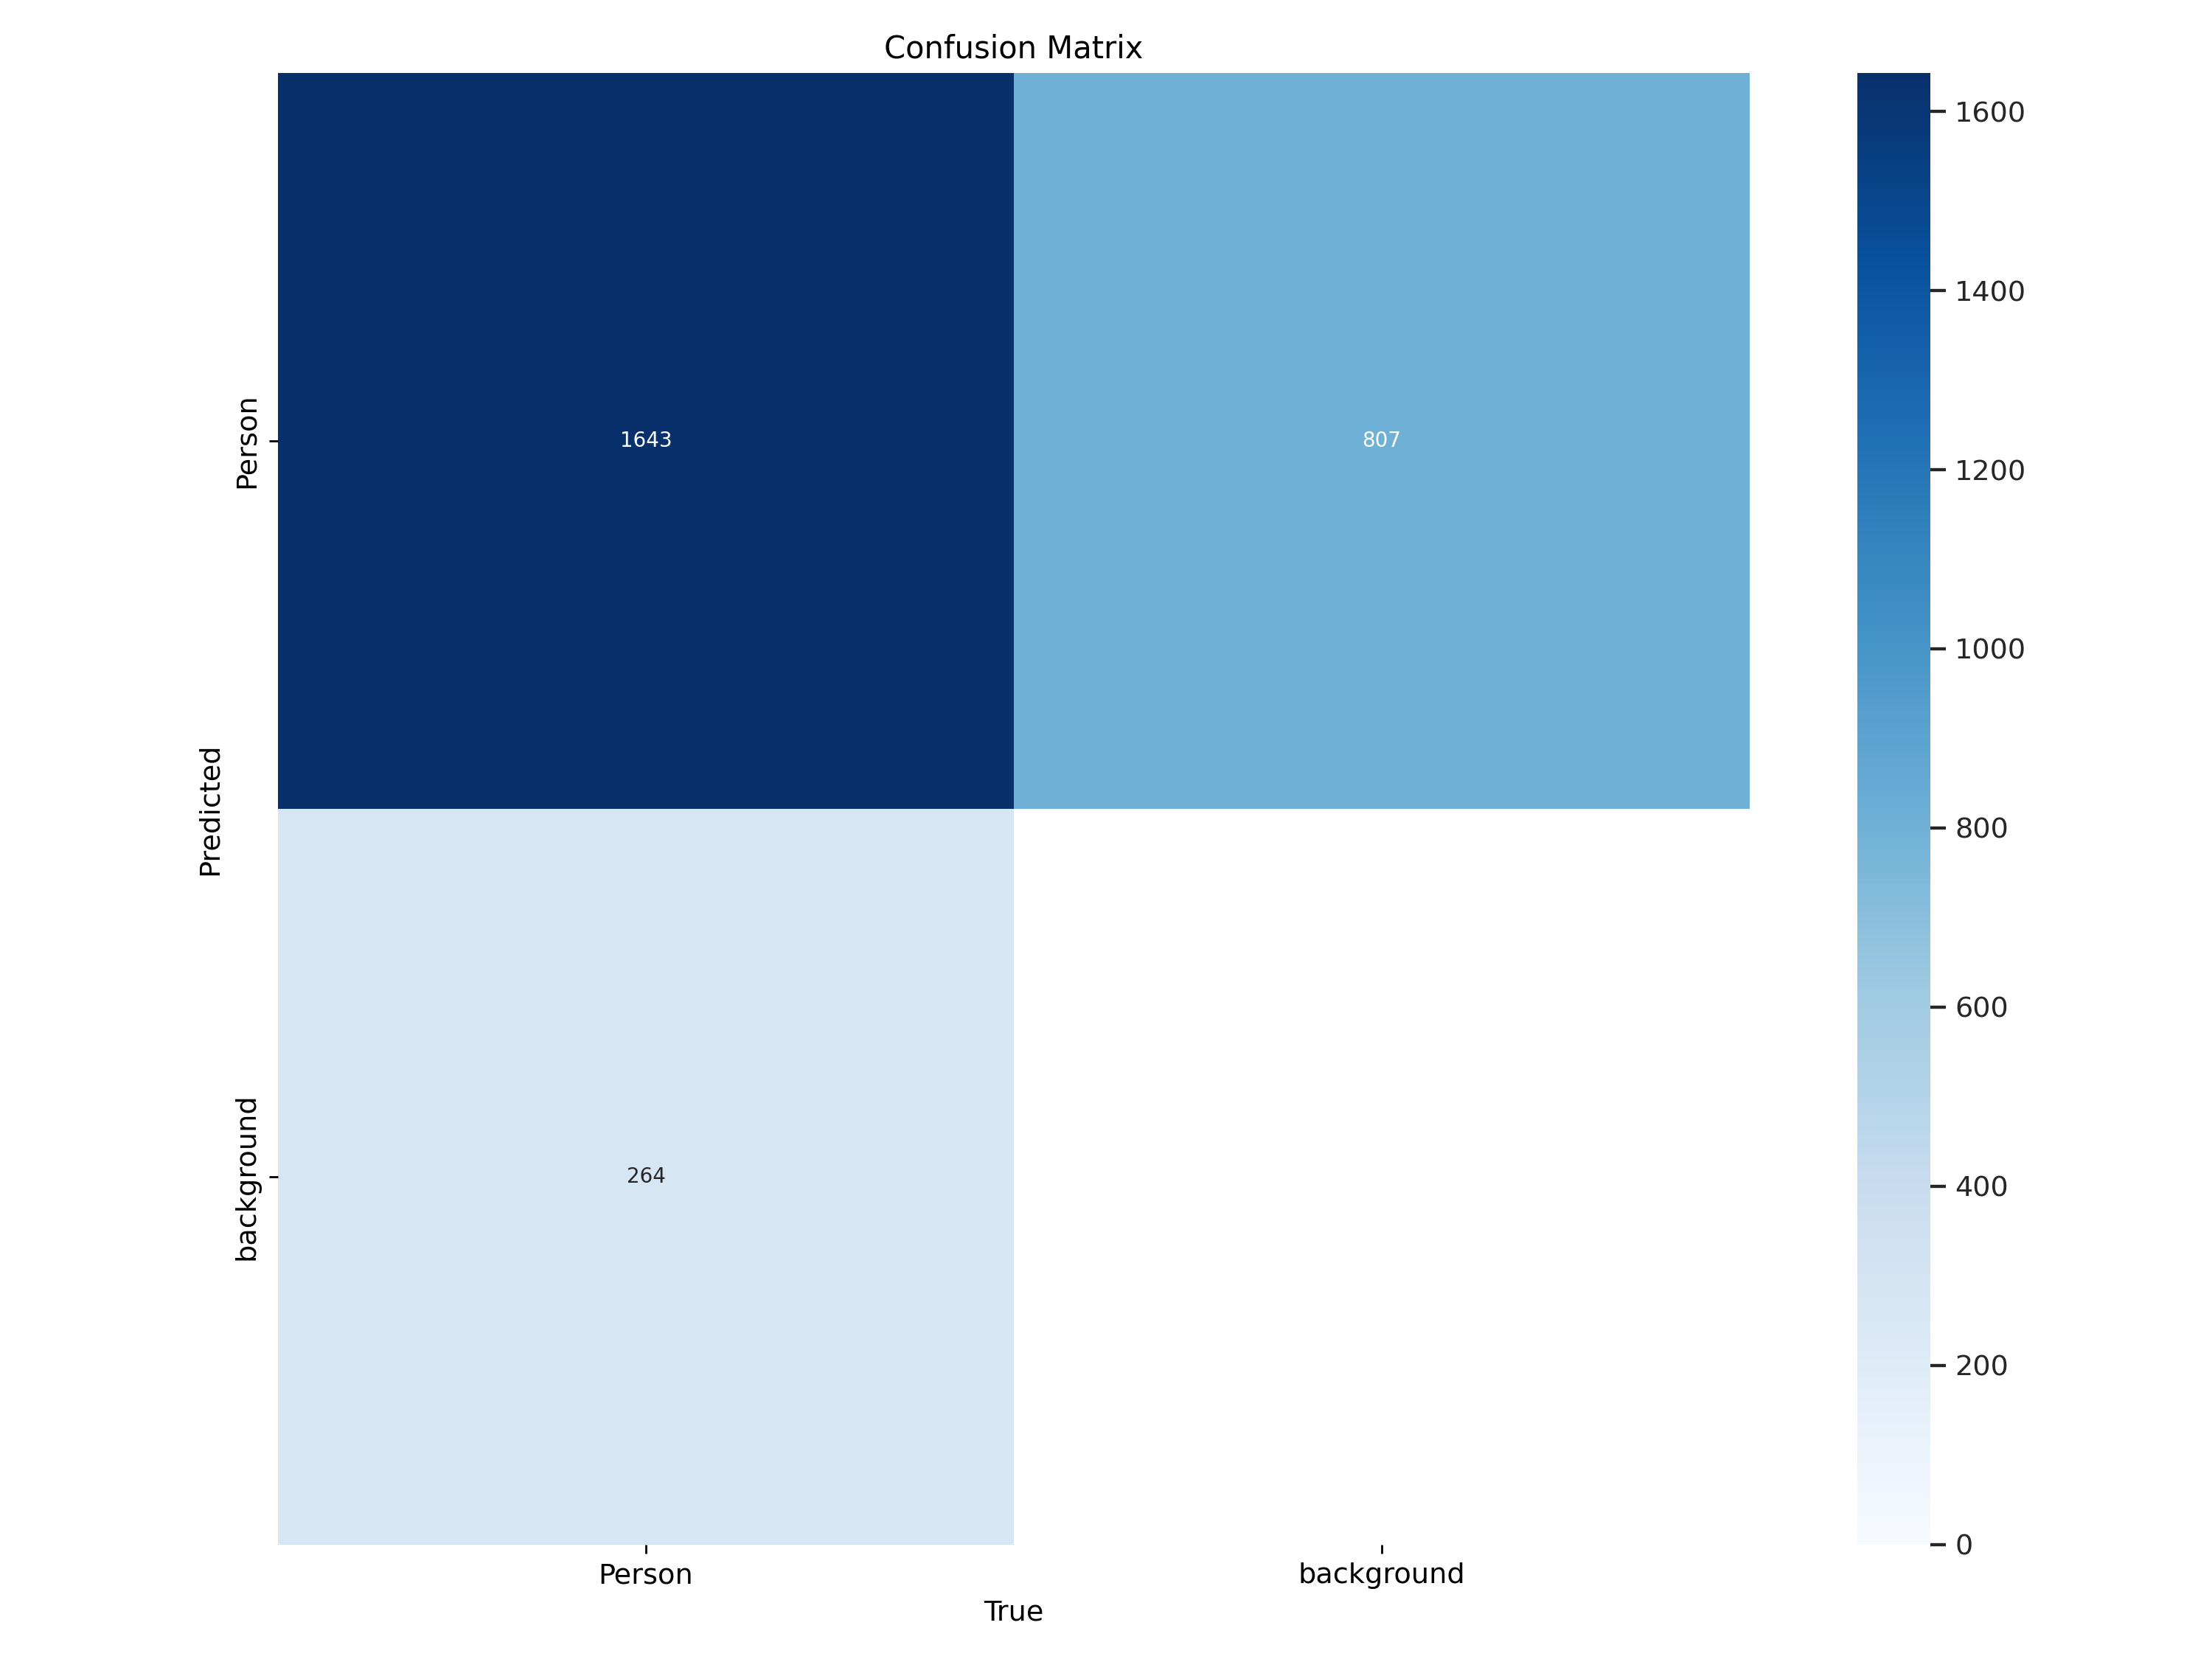

In [16]:
from IPython.display import display, Image

# Properly call the display function
display(Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600))



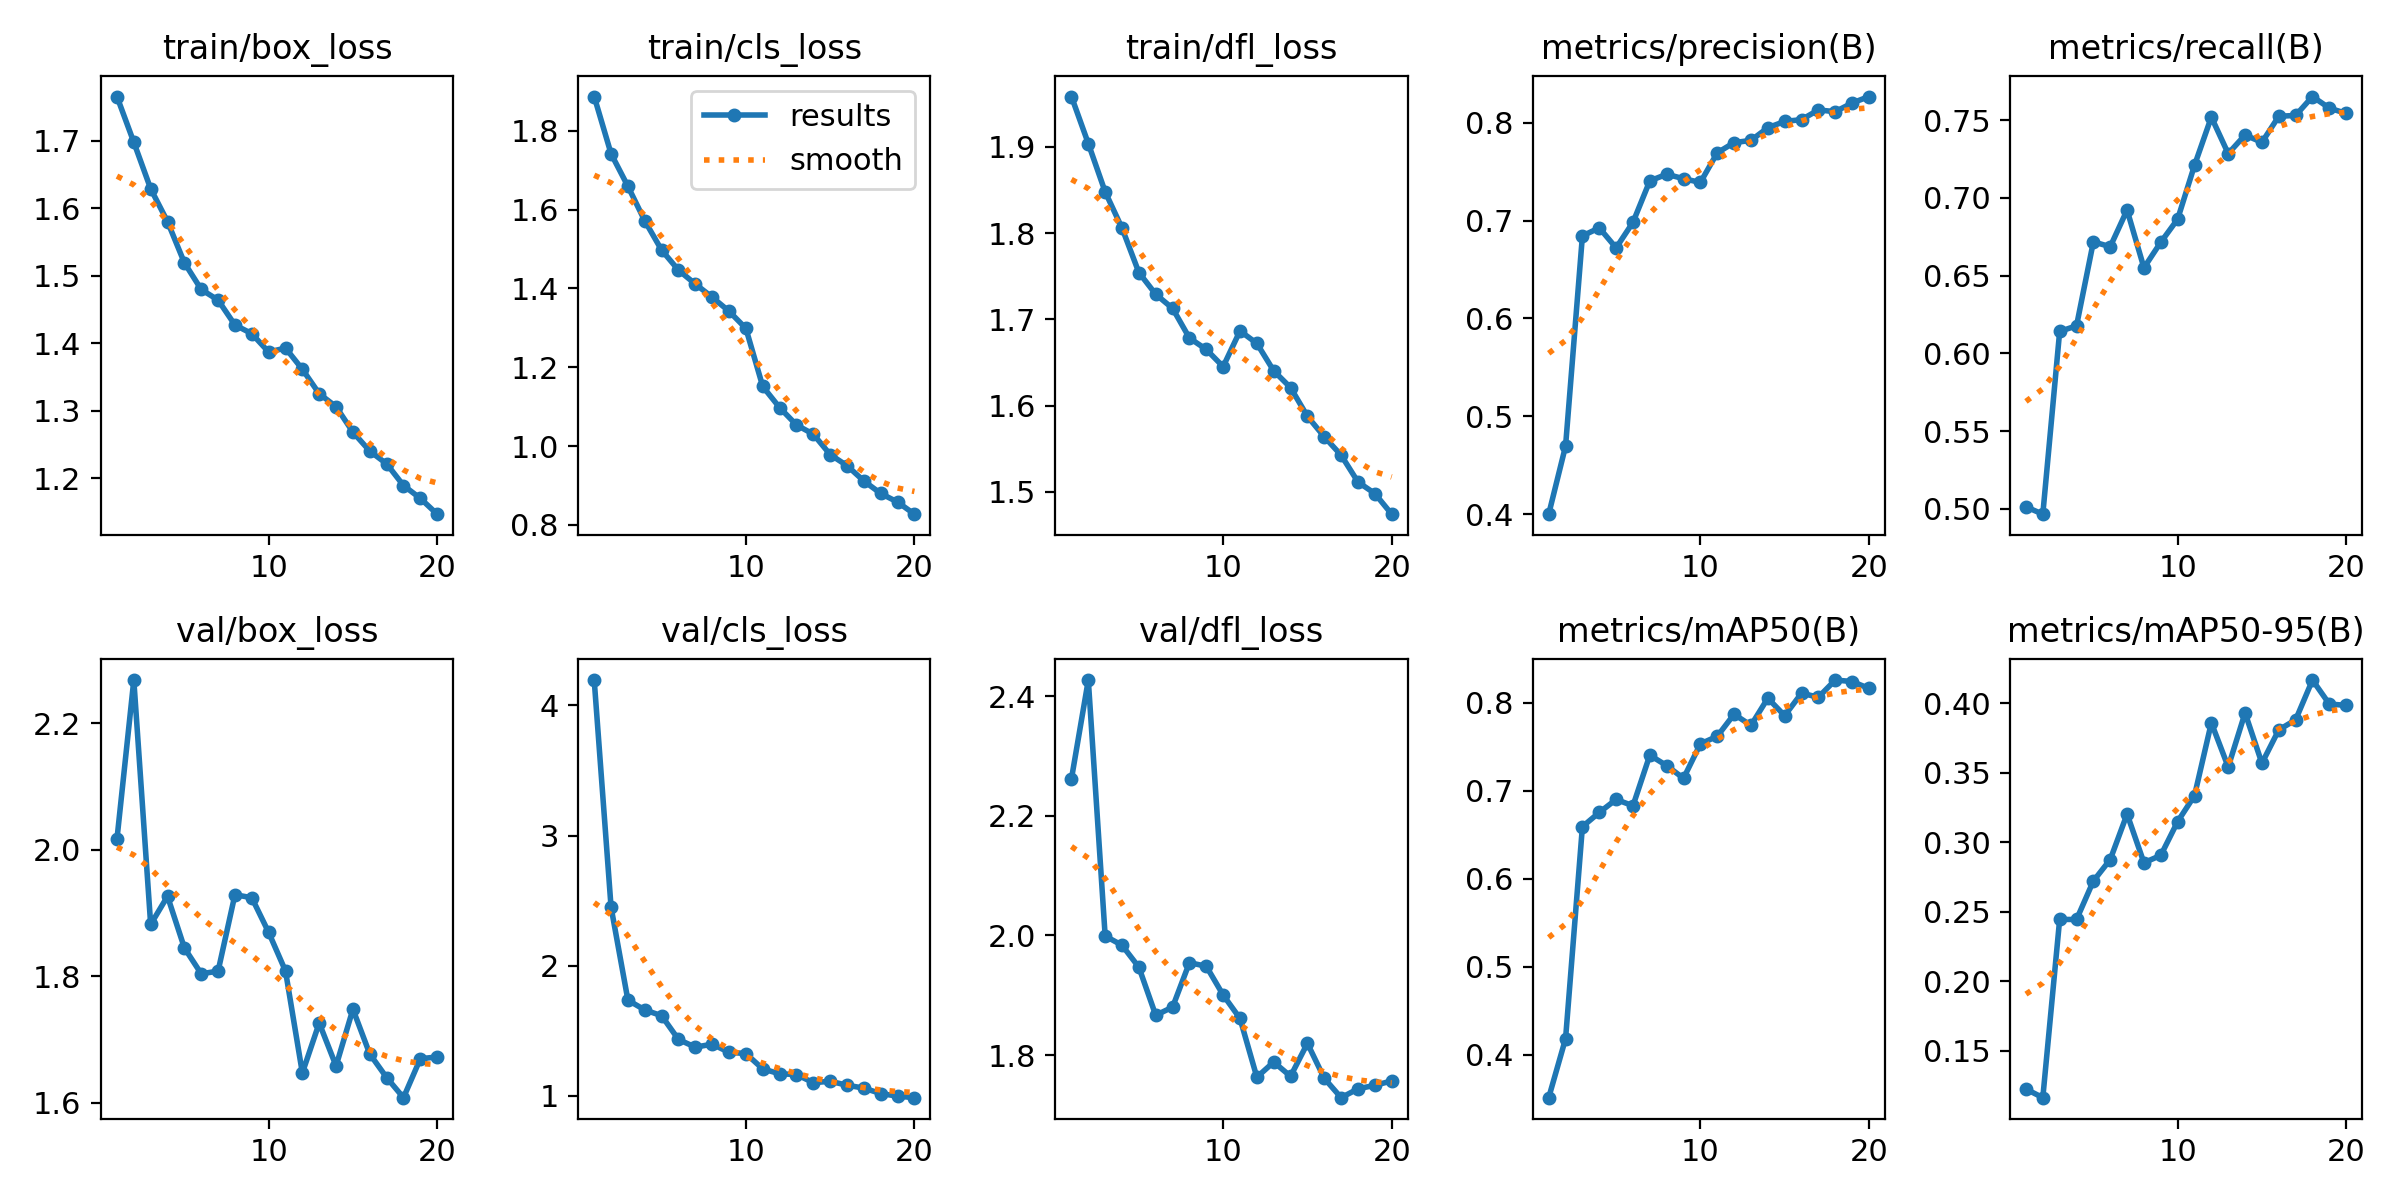

In [18]:
display(Image(filename='/content/runs/detect/train/results.png', width=600))  # Corrected path


In [ ]:
# ### **Analysis of Your Model Training Results**

# #### **1️⃣ Confusion Matrix Interpretation**
# - **True Positives (Person classified correctly as Person):** **1643** → **Good detection rate**
# - **False Positives (Background wrongly classified as Person):** **807** → **Too high, model is over-detecting "Person"**
# - **False Negatives (Person wrongly classified as Background):** **264** → **Not bad, but can be improved**
# - **Background correctly classified as Background:** **(Not shown explicitly, but inferred)**

# 🔹 **Issue:** High **false positives**, meaning the model is mistakenly detecting people in background areas.
# 🔹 **Fix:** Improve **data quality** (better labels) or adjust **confidence threshold**.

# ---

# #### **2️⃣ Training & Validation Loss Trends**
# ✅ **Box Loss, Classification Loss, and DFL Loss (both Train & Validation)**
#    - **All decreasing steadily** → Model is learning well.
#    - **Validation loss fluctuates but follows training loss** → Normal behavior, but watch for overfitting.

# 📌 **Takeaway:** **Good loss reduction; training is effective. No major overfitting yet.**

# ---

# #### **3️⃣ Precision, Recall, and mAP Scores**
# - **Precision (≈0.75 at the end)** → Model is correctly identifying people **75% of the time** when it predicts a person.
# - **Recall (≈0.75 at the end)** → Model is detecting **75% of all actual people present**.
# - **mAP50 (~0.8)** → Model is **fairly accurate**, but could be improved.
# - **mAP50-95 (~0.4)** → **Struggles with stricter accuracy**, meaning it might struggle on hard-to-detect cases.

# 📌 **Takeaway:**
# 🔹 Model has **good general detection** but needs **better precision** to reduce false detections.
# 🔹 Try **confidence tuning & more diverse training images** to improve performance.

# ---

# ### **🔧 Next Steps to Improve**
# 1. **Reduce False Positives:** Increase confidence threshold (e.g., `conf=0.6` instead of `0.5`).
# 2. **Improve Training Data:** Add harder cases (varied lighting, backgrounds).
# 3. **Fine-tune Learning Rate:** Reduce it gradually in later epochs for better accuracy.
# 4. **More Training Epochs:** 20 epochs might not be enough; try **40–50 epochs**.


In [54]:
# from ultralytics import YOLO

# model = YOLO("/content/runs/detect/train/weights/best.pt")  # Load trained model
# metrics = model.val(data=f"{dataset.location}/data.yaml", conf=0.5)  # Validate model
# print(metrics)


import shutil

prediction_folder = "/content/runs/detect/predict/"

# Delete the folder if it exists to remove old results
if os.path.exists(prediction_folder):
    shutil.rmtree(prediction_folder)
    print("Old prediction results deleted.")


Old prediction results deleted.


In [ ]:
# from ultralytics import YOLO

# # Load trained model
# model = YOLO("/content/runs/detect/train/weights/best.pt")

# # Run prediction with streaming (efficient for large videos)
# results = model.predict(source="/content/test.mp4", conf=0.5, save=True, stream=True)


# # Process results frame by frame
# for result in results:
#     boxes = result.boxes  # Bounding boxes
#     masks = result.masks  # Segmentation masks (if any)
#     print(boxes)


from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run prediction on the new test.mp4 video
results = model.predict(source="/content/test.mp4", conf=0.5, save=True)

print("Prediction completed. Checking output folder...")







WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/387) /content/test.mp4: 448x800 4 Persons, 60.3ms
video 1/1 (frame 2/387) /content/test.mp4: 448x800 4 Persons, 59.0ms
video 1/1 (frame 3/387) /content/test.mp4: 448x800 4 Persons, 59.0ms
video 1/1 (frame 4/387) /content/test.mp4: 448x800 4 Persons, 59.0ms
video 1/1 (frame 5/387) /content/test.mp4: 448x800 3 Persons, 59.0ms
video 1/1 (frame 6/387) /content/test.mp4: 448x800 3 Persons, 59.0ms
video 1/1 (frame 7/387) /content/test.mp4:

In [1]:
# import os

# prediction_folder = "/content/runs/detect/predict/"

# # Check if the folder exists
# if os.path.exists(prediction_folder):
#     # List the contents
#     files = os.listdir(prediction_folder)

#     if files:
#         print("Prediction results found:", files)
#     else:
#         print("No prediction results found.")
# else:
#     print("Prediction folder does not exist.")

import os

prediction_folder = "/content/runs/detect/predict/"

if os.path.exists(prediction_folder):
    files = os.listdir(prediction_folder)

    if files:
        print("New Prediction results found:", files)
    else:
        print("No new predictions found.")
else:
    print("Prediction folder does not exist.")



New Prediction results found: ['test.avi']


In [2]:
from google.colab import files
files.download("/content/runs/detect/predict/test.avi")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>